# Cohort 38 AUCs analysis 

### Imports and environment setup

- Date of run: 2024-09-26
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprosessing

For this analysis, we are going to work with the MS matrix ─located at ["data/ms/MS_verification_38.csv"](<../data/ms/MS_verification_38.csv>)─. For this dataset so far we have no metadata, just values for peptides and pathology condition for the 38 samples.

In [4]:
MS_38_PATH = "../data/ms/MS_verification_38.csv"

In [5]:
df_38 = pd.read_csv(MS_38_PATH, sep="\t", header=[0,1], index_col=0)

In [6]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_38.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_38.columns.values]


In [7]:
# Rename the column 0 to "Pathology" and make it categorical
df_38 = df_38.rename(columns={df_38.columns[0]: "Pathology"})
df_38 = utils.cols_as_category(df_38, {'Pathology':{'C2': 0, 'T1': 1}})

# Computing the models

In [8]:
# General parames
RESULTS_PATH = '../data/results/38'
BIOMARKERS_38 = df_38.columns[1:]
METHODS = ['direct']

In [9]:
# This is costly, so is commented out to compute it only once

models_38 = utils.compute_all_models_and_save(df=df_38, 
                                              biomarkers=BIOMARKERS_38, 
                                              target_col='Pathology', 
                                              methods=METHODS, 
                                              max_biomarker_count=1,
                                              folder_name=RESULTS_PATH,
                                              auc_threshold=0.0, 
                                              plot_rocs=True)

In [10]:
# Load the results
df_38_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0)
df_38_results_direct_max_1[["AUC"]].head(10)

,AUC
Biomarker_1,
PERM_IANVFTNAFR,0.96667
PERM_VVLEGGIDPILR,0.95000
CADH1_VFYSITGQGADTPPVGVFIIER,0.94444
SPIT1_SFVYGGCLGNK,0.93333
CADH1_NLVQIK,0.92500
SPIT1_WYYDPTEQICK,0.92500
ENOA_YISPDQLADLYK,0.91944
KPYM_NTGIICTIGPASR,0.91389
CASP3_SGTDVDAANLR,0.91389


In [11]:
roc_image_path = f"{RESULTS_PATH}/direct/max_1/rocs/PERM_IANVFTNAFR.png"
display(HTML("<img src='"+roc_image_path+"'>"))

In [12]:
roc_csv_path = f"{RESULTS_PATH}/direct/max_1/rocs/PERM_IANVFTNAFR.csv"
roc_df = pd.read_csv(roc_csv_path, sep=',', index_col=0, header=0)
roc_df

,Sensitivity,Specificity,NPV,PPV
Threshold,,,,
inf,0.00,1.000000,0.473684,0.000000
0.999554,0.05,1.000000,0.486486,1.000000
0.788990,0.75,1.000000,0.782609,1.000000
0.784620,0.75,0.944444,0.772727,0.937500
0.780393,0.80,0.944444,0.809524,0.941176
0.777810,0.80,0.888889,0.800000,0.888889
0.699762,0.95,0.888889,0.941176,0.904762
0.595593,0.95,0.722222,0.928571,0.791667
0.592341,1.00,0.722222,1.000000,0.800000


In [36]:
# Compute the mean and std of the biomarkers, order by std 
# using pandas
mean_std_df_38 = df_38.describe().loc[['mean', 'std']].T
mean_std_df_38['std'] = mean_std_df_38['std'].round(2)
mean_std_df_38 = mean_std_df_38.sort_values(by='std', ascending=True)
mean_std_df_38.head(20)

,mean,std
CASP3_SGTDVDAANLR,0.047876,0.05
FABP5_ELGVGIALR,0.050600,0.06
CALU_TFDQLTPEESK,0.187909,0.11
SERPH_GVVEVTHDLQK,0.101780,0.11
CTNB1_LLNDEDQVVVNK,0.090976,0.11
CH10_VLLPEYGGTK,0.107802,0.11
CSF1_TFYETPLQLLEK,0.117418,0.12
XPO2_LLQTDDEEEAGLLELLK,0.090018,0.12
GTR1_TFDEIASGFR,0.092829,0.12
XPO2_ANIVHLMLSSPEQIQK,0.093842,0.12


In [26]:
MS_215_PATH = "../data/ms/MS_215_cleaned.csv"
df_215 = pd.read_csv(MS_215_PATH, sep="\t", header=[0,1], index_col=0)

In [27]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_215.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_215.columns.values]

In [32]:
# Rename the first column as "Pathology" and make it categorical
df_215 = df_215.rename(columns={df_215.columns[0]: "Pathology"})

# Delete the second and thiird columns
df_215 = df_215.drop(columns=df_215.columns[1:3])


,Pathology,AGR2_LPQTLSR,AGR2_LPQTLSR.1,AGR2_LAEQFVLLNLVYETTDK,AGR2_LAEQFVLLNLVYETTDK.1,AGRIN_VLGAPVPAFEGR,AGRIN_VLGAPVPAFEGR.1,AGRIN_LELGIGPGAATR,AGRIN_LELGIGPGAATR.1,BCAM_AGAAGTAEATAR,...,PRDX1_LVQAFQFTDK,PRDX1_LVQAFQFTDK.1,CAYP1_EAVIAAAFAK,CAYP1_EAVIAAAFAK.1,CAYP1_SGDGVVTVDDLR,CAYP1_SGDGVVTVDDLR.1,MIF_LLCGLLAER,MIF_LLCGLLAER.1,MIF_VYINYYDMNAANVGWNNSTFA,MIF_VYINYYDMNAANVGWNNSTFA.1
510,T,14440051.0,99572496,4053356.0,62237908,15542028.0,207122368.0,9475339.0,76265064,985157.0,...,184313424,53116872,4.517142e+08,247732288,2.378720e+08,20743932,1111064064,57598156,3082315.0,NaN
640,T,NaN,96356064,1397074.0,57743972,19466340.0,207731248.0,12070786.0,89037712,2039204.0,...,109246512,57458048,3.250705e+07,288644992,1.944167e+07,26804828,534164096,63832348,1484966.0,2417648.0
651,T,7313842.0,91459728,3048470.0,64930456,6881890.0,210067232.0,3698708.0,79922480,1067997.0,...,114285096,56205212,2.280461e+07,265655696,9.233160e+06,19351518,418148256,59953152,648406.0,NaN
791,T,72179488.0,88601752,17232010.0,58072616,49194092.0,193309424.0,27684306.0,74975328,11631336.0,...,1703461120,48596288,2.990306e+09,228312480,1.732649e+09,23372316,5706497536,54802048,12011924.0,NaN
800,T,34722664.0,115468496,12655026.0,66558108,12366541.0,209379072.0,7023005.0,81516104,5468220.0,...,814349504,52646128,4.850554e+08,282670976,2.632056e+08,23676088,2427836416,58034428,6421416.0,1940964.0


In [33]:
BIOMARKERS_215 = df_215.columns[1:]

In [35]:
# Compute the mean and std of the biomarkers, order by std 
# using pandas
mean_std_df_215 = df_215.describe().loc[['mean', 'std']].T
mean_std_df_215['std'] = mean_std_df_215['std'].round(2)
mean_std_df_215 = mean_std_df_215.sort_values(by='std', ascending=True)
mean_std_df_215.head(20)

,mean,std
VAMP8_GENLEHLR,6.519445e+05,372351.56
SYIC_EFEDAFPADFIAEGIDQTR,1.422542e+06,703223.35
ITA3_YLLLAGAPR,1.333062e+06,837654.29
ITA3_EAGNPGSLFGYSVALHR,1.160677e+06,925965.40
VAMP8_NLQSEVEGVK,1.552026e+06,1287382.03
MUC1_EGTINVHDVETQFNQYK.1,9.223840e+06,1838433.90
MIF_VYINYYDMNAANVGWNNSTFA,1.883830e+06,2012438.43
SG2A1_ELLQEFIDSDAAAEAMGK.1,9.595025e+06,2430884.77
RUVB1_LDPSIFESLQK,2.643180e+06,2920968.49
SPIT1_WYYDPTEQICK,3.587661e+06,3277079.69


In [38]:
common_biomarkers_215

{'ANXA2',
 'CADH1',
 'CAYP1',
 'CD81',
 'CTNB1',
 'ITA3',
 'MIF',
 'MUC1',
 'NAMPT',
 'RAB8A',
 'RUVB1',
 'SG2A1',
 'SPIT1',
 'SYIC',
 'TERA',
 'VAMP8'}

In [39]:
common_biomarkers_38

{'CALU',
 'CASP3',
 'CATD',
 'CH10',
 'CSF1',
 'CTNB1',
 'FABP5',
 'FSCN1',
 'GTR1',
 'MMP2',
 'PDIA1',
 'ROA2',
 'SERPH',
 'SPIT1',
 'TIMP2',
 'XPO2'}

In [40]:
common_biomarkers_215.intersection(common_biomarkers_38)

{'CTNB1', 'SPIT1'}

In [41]:
MS_107_PATH = "../data/ms/MS_validation_107_9_hyperplasias.csv"
df_107 = pd.read_csv(MS_107_PATH, sep="\t", header=[0,1], index_col=0)

In [43]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_107.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_107.columns.values]

In [45]:
# Rename the first column as "Pathology" and make it categorical
df_107 = df_107.rename(columns={df_107.columns[0]: "Pathology"})

In [46]:
BIOMARKERS_107 = df_107.columns[1:]

In [64]:
# Compute the mean and std of the biomarkers, order by std 
# using pandas
mean_std_df_107 = df_107.describe().loc[['mean', 'std']].T
mean_std_df_107['std'] = mean_std_df_107['std'].round(2)
mean_std_df_107 = mean_std_df_107.sort_values(by='std', ascending=True)
mean_std_df_107.head(25)

,mean,std
CASP3_SGTDVDAANLR,0.043426,0.04
FABP5_ELGVGIALR,0.055299,0.05
CTNB1_LLNDEDQVVVNK,0.064633,0.07
CTNB1_LVQLLVR,0.076362,0.07
XPO2_ANIVHLMLSSPEQIQK,0.061309,0.07
MMP2_IDAVYEAPQEEK,0.074980,0.09
GTR1_TFDEIASGFR,0.079857,0.09
CSF1_TFYETPLQLLEK,0.076764,0.10
CH10_VLLPEYGGTK,0.135503,0.12
TIMP2_EVDSGNDIYGNPIK,0.159386,0.13


In [62]:
bmk_n = 25

# Select the mean_std_df_215 first 0 indexes and slit them by _ and add them to a set
common_biomarkers_215 = set()
for index in mean_std_df_215.index[:bmk_n]:
    common_biomarkers_215.add(index.split('_')[0])

# Do the same for the mean_std_df_38
common_biomarkers_38 = set()
for index in mean_std_df_38.index[:bmk_n]:
    common_biomarkers_38.add(index.split('_')[0])

common_biomarkers_107 = set()
for index in mean_std_df_107.index[:bmk_n]:
    common_biomarkers_107.add(index.split('_')[0])


In [63]:
common_biomarkers_107.intersection(common_biomarkers_38).intersection(common_biomarkers_215)

{'CTNB1', 'SPIT1'}

<Axes: xlabel='Pathology', ylabel='CTNB1_LLNDEDQVVVNK'>

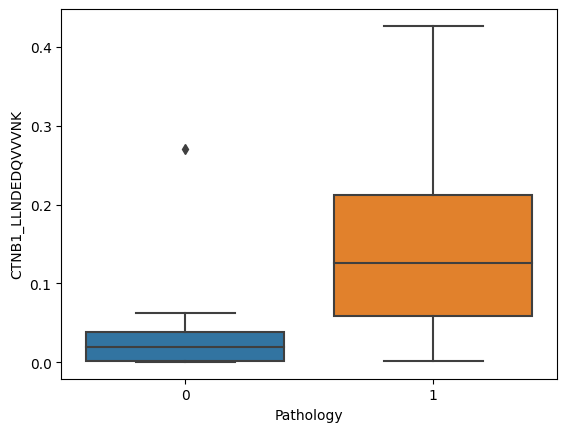

In [67]:
#distribution of the CTNNB1 biomarker by pathology in the 38 dataset
import seaborn as sns
sns.boxplot(x='Pathology', y='CTNB1_LLNDEDQVVVNK', data=df_38)

<Axes: xlabel='Pathology', ylabel='SPIT1_WYYDPTEQICK'>

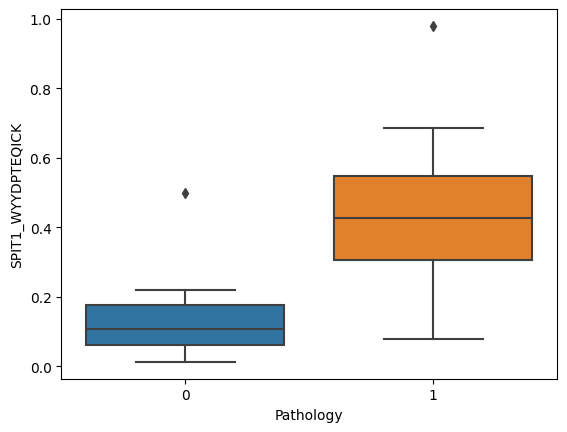

In [68]:
sns.boxplot(x='Pathology', y='SPIT1_WYYDPTEQICK', data=df_38)